In [1]:
import requests
from requests.auth import HTTPBasicAuth
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import plotly_express as px

import geopy
import json
from shapely.geometry import Point
try: #spelling depends on enviroment version 
    import urllib2 as urllib #URL handling module
except ImportError:
    import urllib.request as urllib
import statsmodels.formula.api as smf    # for OLS regression
import matplotlib.pyplot as plt
import folium
from folium import plugins
import contextily as cx
from matplotlib_scalebar.scalebar import ScaleBar
import numpy as np

In [2]:
username = "AID9d856484ccfa568bebcad8f3fb0a1fa8"
token = "4cd80caf23a0d5cddd126978a376dd7a"
mapbox_token = "pk.eyJ1Ijoib2ZmaWNpYWxmcmVkIiwiYSI6ImNremhucWQxajQzYTQydnA0Y2cyaWVlemYifQ.rHit1ma6fsUrAjsxqoxheA"

In [3]:
#LOAD DATA
kiosks = pd.read_csv('LinkNYC_Locations.csv')

In [4]:
#SELECT USEFUL COLUMNS
kiosks = kiosks[['CB Link ID', 'Borough',
       'Latitude', 'Longitude', 'Project Status',
       'Link Smoke Tested and Activated (A)', 'Link Installation (A)', 'IxN Corner']]

#RENAME COLUMNS FOR EASE OF USE
kiosks.columns = ['linkID', 'boro', 'lat', 'long', 'status',
       'activationDate', 'installationDate', 'streetPlacement']

In [5]:
def convertPlacement(row):
    if row == 'MIDBLOCK':
        return 'block'
    else:
        return 'corner'

kiosks.streetPlacement = kiosks.streetPlacement.apply(convertPlacement)

In [6]:
kiosks['wifi'] = 0

In [7]:
dataframes = np.array_split(kiosks, 21)

In [8]:
df0 = dataframes[0]
df1 = dataframes[1]
df2 = dataframes[2]
df3 = dataframes[3]
df4 = dataframes[4]
df5 = dataframes[5]
df6 = dataframes[6]
df7 = dataframes[7]
df8 = dataframes[8]
df9 = dataframes[9]
df10 = dataframes[10]
df11 = dataframes[11]
df12 = dataframes[12]
df13 = dataframes[13]
df14 = dataframes[14]
df15 = dataframes[15]
df16 = dataframes[16]
df17 = dataframes[17]
df18 = dataframes[18]
df19 = dataframes[19]
df20 = dataframes[20]

In [11]:
def get_wigle_data(row, url='https://api.wigle.net/api/v2/network/search', username = username, token = token):
    radius = 0.00008997741 #20 meters each way
    lat = row['lat']
    longitude = row['long']
    lat1 = str(lat - radius)
    lat2 = str(lat + radius)
    long1 = str(longitude - radius)
    long2 = str(longitude + radius)
    payload = {'latrange1':lat1, 'latrange2':lat2, 'longrange1':long1, 'longrange2':long2, 'resultsPerPage': 1, 'api_key': (username + token).encode()}
    results = requests.get(url=url, params=payload, auth=HTTPBasicAuth(username, token)).json()
    return results['totalResults']
        

In [10]:
# df0['wifi'] = df0.apply(get_wigle_data, axis=1)
# df1['wifi'] = df1.apply(get_wigle_data, axis=1)
# df2['wifi'] = df2.apply(get_wigle_data, axis=1)
# df3['wifi'] = df3.apply(get_wigle_data, axis=1)
df4['wifi'] = df4.apply(get_wigle_data, axis=1)
df5['wifi'] = df5.apply(get_wigle_data, axis=1)
df6['wifi'] = df6.apply(get_wigle_data, axis=1)
df7['wifi'] = df7.apply(get_wigle_data, axis=1)
df8['wifi'] = df8.apply(get_wigle_data, axis=1)
df9['wifi'] = df9.apply(get_wigle_data, axis=1)
df10['wifi'] = df10.apply(get_wigle_data, axis=1)
df11['wifi'] = df11.apply(get_wigle_data, axis=1)
df12['wifi'] = df12.apply(get_wigle_data, axis=1)
df13['wifi'] = df13.apply(get_wigle_data, axis=1)
df14['wifi'] = df14.apply(get_wigle_data, axis=1)
df15['wifi'] = df15.apply(get_wigle_data, axis=1)
df16['wifi'] = df16.apply(get_wigle_data, axis=1)
df17['wifi'] = df17.apply(get_wigle_data, axis=1)
df18['wifi'] = df18.apply(get_wigle_data, axis=1)
df19['wifi'] = df19.apply(get_wigle_data, axis=1)
df20['wifi'] = df20.apply(get_wigle_data, axis=1)

KeyError: 'totalResults'

In [11]:
df15.to_csv("df15.csv")
df16.to_csv("df16.csv")
df17.to_csv("df17.csv")
df18.to_csv("df18.csv")
df19.to_csv("df19.csv")

In [95]:
dataframes[4]

,linkID,boro,lat,long,status,activationDate,installationDate,streetPlacement,wifi
356,LINK-010997,Manhattan,40.846875,-73.935653,Installed,NaN,12/06/2017,corner,0
357,LINK-000963,Manhattan,40.782528,-73.980586,Live,06/27/2016,05/25/2016,corner,0
358,LINK-010897,Manhattan,40.800781,-73.946241,Live,01/25/2017,10/15/2016,corner,0
359,LINK-010682,Manhattan,40.789541,-73.969644,Installed,NaN,05/07/2018,corner,0
360,LINK-006039,Manhattan,40.833447,-73.941740,Live,07/21/2016,07/15/2016,corner,0
...,...,...,...,...,...,...,...,...,...
440,LINK-013212,Brooklyn,40.673527,-73.950078,Live,03/08/2017,02/17/2017,corner,0
441,LINK-012462,Manhattan,40.761118,-73.975684,Live,01/08/2018,02/11/2017,corner,0
442,LINK-013990,Manhattan,40.744114,-73.995892,Live,01/03/2018,10/07/2017,corner,0
443,LINK-001017,Brooklyn,40.691234,-73.986384,Live,04/20/2017,02/17/2017,corner,0


In [12]:
df0 = pd.read_csv('wigle_data/df0.csv')
df1 = pd.read_csv('wigle_data/df1.csv')
df2 = pd.read_csv('wigle_data/df2.csv')
df3 = pd.read_csv('wigle_data/df3.csv')
df4 = pd.read_csv('wigle_data/df4.csv')
df5 = pd.read_csv('wigle_data/df5.csv')
df6 = pd.read_csv('wigle_data/df6.csv')
df7 = pd.read_csv('wigle_data/df7.csv')
df8 = pd.read_csv('wigle_data/df8.csv')
df9 = pd.read_csv('wigle_data/df9.csv')
df10 = pd.read_csv('wigle_data/df10.csv')
df11 = pd.read_csv('wigle_data/df11.csv')
df12 = pd.read_csv('wigle_data/df12.csv')
df13 = pd.read_csv('wigle_data/df13.csv')
df14 = pd.read_csv('wigle_data/df14.csv')
df15 = pd.read_csv('wigle_data/df15.csv')
df16 = pd.read_csv('wigle_data/df16.csv')
df17 = pd.read_csv('wigle_data/df17.csv')
df18 = pd.read_csv('wigle_data/df18.csv')
df19 = pd.read_csv('wigle_data/df19.csv')

In [38]:
df = df0.append(df1)
df = df.append(df2)
df = df.append(df3)
df = df.append(df4)
df = df.append(df5)
df = df.append(df6)
df = df.append(df7)
df = df.append(df8)
df = df.append(df9)
df = df.append(df10)
df = df.append(df11)
df = df.append(df12)
df = df.append(df13)
df = df.append(df14)
df = df.append(df15)
df = df.append(df16)
df = df.append(df17)
df = df.append(df18)
df = df.append(df19)

(1780, 10)

In [12]:
tocluster = pd.read_csv('wigle_data/10_meter_wifi_density.csv')
tocluster = tocluster[['activationDate', 'lat', 'long', 'streetPlacement', 'wifi', 'boro']]
tocluster['activationDate'] = pd.to_datetime(tocluster.activationDate)

In [139]:
tocluster['wifiLog'] = np.log(tocluster['wifi'])

/Users/fred/opt/anaconda3/envs/study_env/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/y4/t37jhmcx5fv_6z2p5_3s7py00000gn/T/ipykernel_83566/656435206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tocluster['wifiLog'] = np.log(tocluster['wifi'])


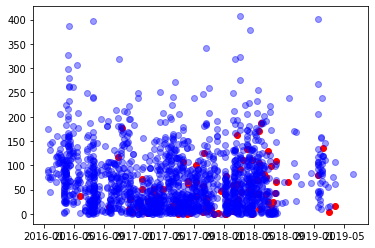

In [42]:
midblock = tocluster.loc[tocluster['streetPlacement'] == 'block']
corner = tocluster.loc[tocluster['streetPlacement'] == 'corner']

plt.scatter(midblock.activationDate, midblock.wifi, color = 'red')
plt.scatter(corner.activationDate, corner.wifi, color = 'blue', alpha=0.4)
plt.show()

In [140]:
gdf = gpd.GeoDataFrame(tocluster, geometry=gpd.points_from_xy(df.long, df.lat)).dropna(subset = ['activationDate'])
gdf.crs = "EPSG:4326"

In [152]:
census_2020.columns

Index(['Borough', 'GEOID', 'Hsp_10', 'Hsp_10P', 'WNH_10', 'WNH_10P', 'BNH_10',
       'BNH_10P', 'ANH_10', 'ANH_10P', 'ONH_10', 'ONH_10P', 'NH2pl_10',
       'NH2pl_10P', 'Hsp_20', 'Hsp_20P', 'WNH_20', 'WNH_20P', 'BNH_20',
       'BNH_20P', 'ANH_20', 'ANH_20P', 'ONH_20', 'ONH_20P', 'NH2pl_20',
       'NH2pl_20P', 'Hsp_Ch', 'Hsp_PCh', 'WNH_Ch', 'WNH_PCh', 'BNH_Ch',
       'BNH_PCh', 'ANH_Ch', 'ANH_PCh', 'ONH_Ch', 'ONH_PCh', 'NH2pl_Ch',
       'NH2pl_PCh', 'Unnamed: 98', 'BoroName', 'geometry'],
      dtype='object')

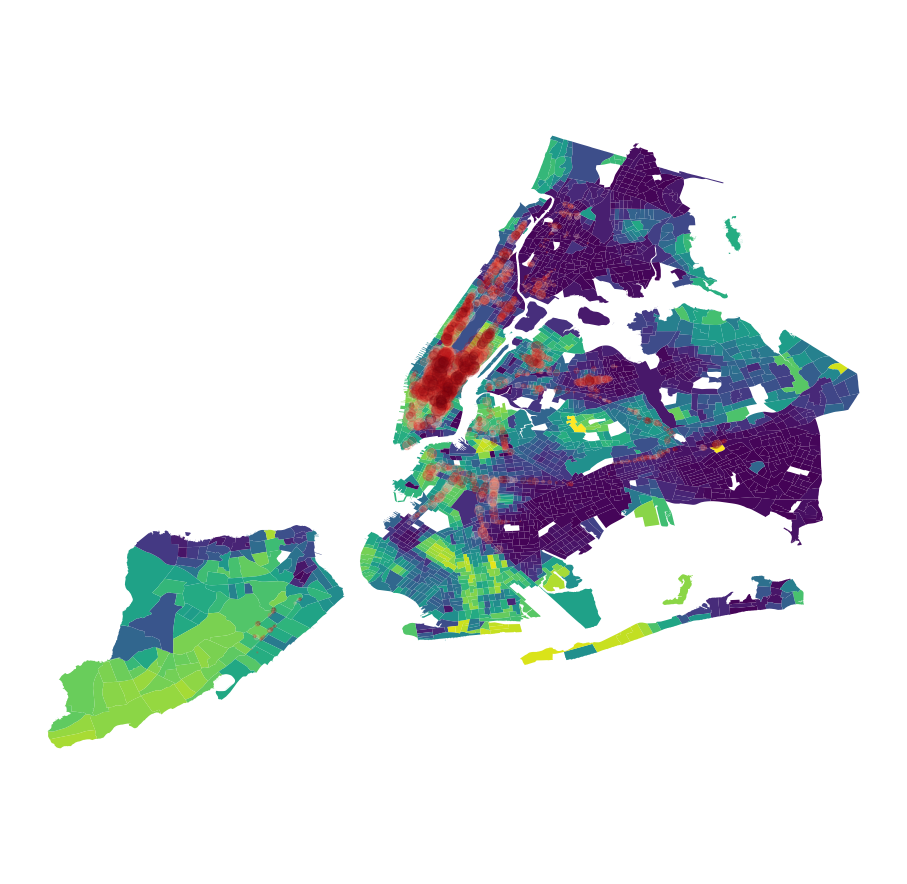

In [156]:
fig, ax = plt.subplots(figsize=(16,16))
# gdf.plot(ax=ax, color='lightgray', edgecolor='grey', linewidth=0.4)
census_2020.plot("WNH_20P", ax=ax)
gdf.plot(ax=ax,cmap='Reds', markersize='wifi', alpha=0.2, categorical=False, legend=True )
ax.axis('off')
plt.axis('equal')
plt.show()

In [96]:
#get census demographic data and select for alameda county
data = pd.read_csv('tract_covariates.csv')
census = pd.DataFrame(data=data)
census = census.loc[census.state == 36]

boroughs = [5, 47, 61, 81, 85]

census = census.loc[census.county.isin(boroughs)]

def tractify(row):
    state = str(row.state)
    county =  str(row.county)
    tract = str(row.tract)
    county = (3 - len(county))* "0" + county
    tract = (6 - len(tract))* "0" + tract
    return (state + county + tract)

census["GEOID"] = census.apply(tractify, axis=1)
census = census[['poor_share2010', 'share_white2010','share_black2010', 
                'share_hisp2010', 'share_asian2010', 'popdensity2010', 'GEOID']]

In [97]:
tracts = gpd.read_file("nyc_census_tracts.json")[["BoroName", "GEOID", "geometry"]]
tracts.head()

,BoroName,GEOID,geometry
0,Manhattan,36061000100,"MULTIPOLYGON (((-74.04388 40.69020, -74.04351 ..."
1,Manhattan,36061000201,"POLYGON ((-73.98450 40.70952, -73.98655 40.709..."
2,Manhattan,36061000202,"MULTIPOLYGON (((-73.98364 40.70960, -73.98450 ..."
3,Manhattan,36061000500,"MULTIPOLYGON (((-74.01093 40.68450, -74.01193 ..."
4,Manhattan,36061000600,"POLYGON ((-73.99022 40.71441, -73.98934 40.714..."


In [98]:
census = gpd.GeoDataFrame(census.merge(tracts, on="GEOID"))

2020 census source: https://www1.nyc.gov/site/planning/planning-level/nyc-population/2020-census.page

In [125]:
census_2020 = pd.read_csv("2020_census/2020_census.csv")
census_2020 = census_2020.loc[census_2020.GeoType == "CT2020"]

In [126]:
census_2020.head()

,Orig Order,GeoType,Borough,GeoID,BCT2020,Name,CD Type,NTA Type,Pop_10,Pop_10P,...,ONH_PCh,NH2pl_Ch,NH2pl_PCh,HUnits_Ch,HUnits_PCh,OcHU_Ch,OcHU_PCh,VacHU_Ch,VacHU_PCh,Unnamed: 98
390,391,CT2020,Bronx,36005000100,2000100.0,NaN,NaN,NaN,"11,091",100.0,...,-95.8,7,233.3,1,NaN,0,NaN,1,NaN,NaN
391,392,CT2020,Bronx,36005000200,2000200.0,NaN,NaN,NaN,"4,334",100.0,...,76.9,84,200.0,145,10.0,166,12.3,-21,-21.4,NaN
392,393,CT2020,Bronx,36005000400,2000400.0,NaN,NaN,NaN,"5,503",100.0,...,33.8,96,181.1,297,15.6,324,18.1,-27,-23.1,NaN
393,394,CT2020,Bronx,36005001600,2001600.0,NaN,NaN,NaN,"5,643",100.0,...,76.1,67,163.4,128,6.4,117,6.1,11,14.5,NaN
394,395,CT2020,Bronx,36005001901,2001901.0,NaN,NaN,NaN,471,100.0,...,3400.0,69,985.7,852,432.5,805,439.9,47,335.7,NaN


In [127]:
census_2020 =  census_2020[['Borough', 'GeoID', 'Hsp_10', 'Hsp_10P', 'WNH_10', 'WNH_10P',
       'BNH_10', 'BNH_10P', 'ANH_10', 'ANH_10P', 'ONH_10', 'ONH_10P',
       'NH2pl_10', 'NH2pl_10P', 'Hsp_20', 'Hsp_20P', 'WNH_20',
       'WNH_20P', 'BNH_20', 'BNH_20P', 'ANH_20', 'ANH_20P', 'ONH_20',
       'ONH_20P', 'NH2pl_20', 'NH2pl_20P', 'Hsp_Ch',
       'Hsp_PCh', 'WNH_Ch', 'WNH_PCh', 'BNH_Ch', 'BNH_PCh', 'ANH_Ch',
       'ANH_PCh', 'ONH_Ch', 'ONH_PCh', 'NH2pl_Ch', 'NH2pl_PCh',
       'Unnamed: 98']]

In [128]:
census_2020.rename(mapper={"GeoID": "GEOID"}, axis=1, inplace=True)

In [129]:
census_2020.columns

Index(['Borough', 'GEOID', 'Hsp_10', 'Hsp_10P', 'WNH_10', 'WNH_10P', 'BNH_10',
       'BNH_10P', 'ANH_10', 'ANH_10P', 'ONH_10', 'ONH_10P', 'NH2pl_10',
       'NH2pl_10P', 'Hsp_20', 'Hsp_20P', 'WNH_20', 'WNH_20P', 'BNH_20',
       'BNH_20P', 'ANH_20', 'ANH_20P', 'ONH_20', 'ONH_20P', 'NH2pl_20',
       'NH2pl_20P', 'Hsp_Ch', 'Hsp_PCh', 'WNH_Ch', 'WNH_PCh', 'BNH_Ch',
       'BNH_PCh', 'ANH_Ch', 'ANH_PCh', 'ONH_Ch', 'ONH_PCh', 'NH2pl_Ch',
       'NH2pl_PCh', 'Unnamed: 98'],
      dtype='object')

In [130]:
census_2020 = gpd.GeoDataFrame(census_2020.merge(tracts, on="GEOID"))

In [132]:
# set the value column that will be visualised
def plot_map(gdf, column, title, source, vmin, vmax, save = False, filename = '', dpi = 200):

    if filename == '':
        filename = column + '.png'

    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(15, 15))

    # remove the axis
    ax.axis('off')

    # add a title and annotation
    ax.set_title(title, fontdict={'fontsize': '25', 'fontweight' : '3'}, wrap=True, pad=15)
    ax.annotate('Source: '+ source, xy=(0.2, .05), xycoords='figure fraction', fontsize=12, color='#555555', wrap=True)

    #add north arrow
    x, y, arrow_length = 0.1, 0.2, 0.1
    ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
                arrowprops=dict(facecolor='black', width=5, headwidth=15),
                ha='center', va='center', fontsize=15,
                xycoords=ax.transAxes)


    # Create colorbar legend
    sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=vmin, vmax=vmax))

    # empty array for the data range
    sm.set_array([]) 

    # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it# add the colorbar to the figure
    fig.colorbar(sm, orientation='horizontal', fraction=0.036, pad=0.01, aspect = 20)
    # create map
    gdf.plot(column=column, cmap='plasma', linewidth=0.8, ax=ax, alpha=0.4, edgecolor='0.8')
    #cx.add_basemap(ax, crs=violent_crime_geo.crs, source=cx.providers.Stamen.TonerLite)
    cx.add_basemap(ax, crs=gdf.crs, source=cx.providers.Esri.WorldGrayCanvas)
    if save == True:
        fig.savefig(filename, dpi=dpi)

<AxesSubplot:>

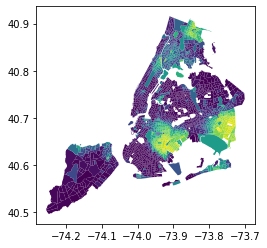

In [145]:
census_2020.plot("BNH_20P")

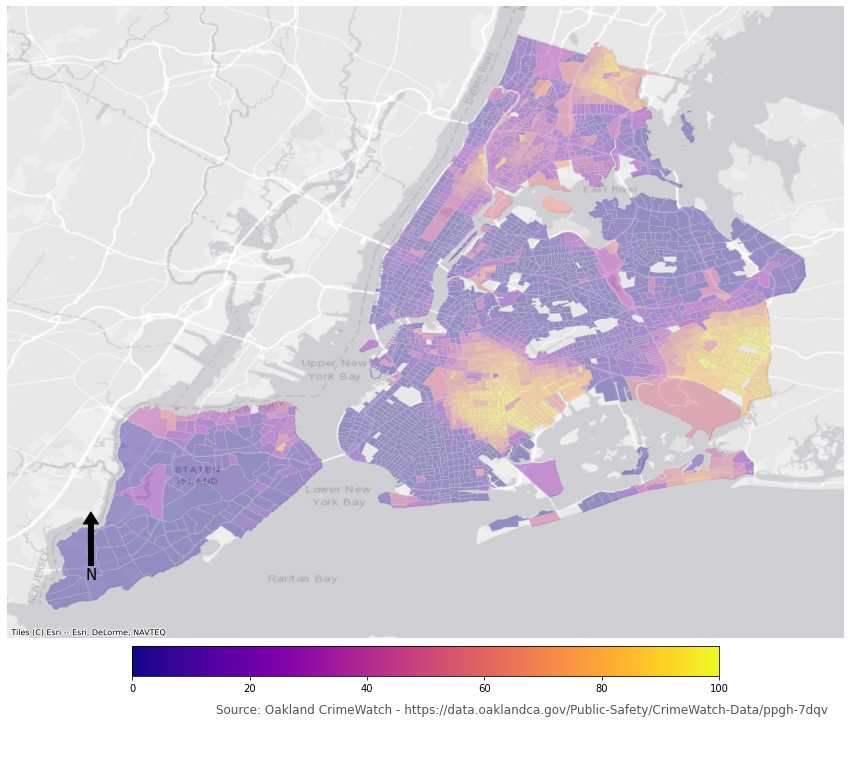

In [136]:
plot_map(gdf=census_2020,
    column='BNH_20P',
    title = '',
    source= 'Oakland CrimeWatch - https://data.oaklandca.gov/Public-Safety/CrimeWatch-Data/ppgh-7dqv',
    vmin=0 , vmax=100 ,
    save = False, filename = 'VCrime.png', dpi=300)

In [196]:
gdf['age'] = (pd.to_datetime("2022-03-20") - gdf.activationDate).dt.days

In [189]:
gdf.dtypes

activationDate     datetime64[ns]
lat                       float64
long                      float64
streetPlacement            object
wifi                        int64
boro                       object
wifiLog                   float64
geometry                 geometry
dtype: object

In [187]:
px.set_mapbox_access_token(mapbox_token)

In [ ]:
fig = px.choropleth(census_2020, geojson=counties, locations='fips', color='unemp',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           scope="usa",
                           labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


In [141]:
gdf.crs = "EPSG:4326"


fig = px.scatter_mapbox(
                        gdf, 
                        lat="lat", 
                        lon="long", 
                        size='wifi', 
                        color = "age",
                        hover_name = "wifi",
                        color_continuous_scale=px.colors.colorbrewer.Reds,  
                        # size_max=15, 
                        zoom=10
                    )

# fig.a
fig.show()

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['activationDate', 'lat', 'long', 'streetPlacement', 'wifi', 'boro', 'wifiLog', 'geometry'] but received: age